In [1]:
%matplotlib widget

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import scipy.interpolate as interp

In [3]:
def utc_time_to_seconds(df):
    df["t"] = df["Timestamp (UTC_TIME)"].apply(
        lambda x: (
            datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f") - datetime.datetime.strptime(df["Timestamp (UTC_TIME)"].iloc[0], "%Y-%m-%d %H:%M:%S.%f")).total_seconds()
    )
    return df

def utc_time_to_datetime(df, label="Timestamp (UTC_TIME)"):
    df["datetime"] = df[label].apply(
        lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
    )
    return df

In [4]:
# read timber/CURRENT.csv as pandas dataframe
df_current = pd.read_csv('timber/CURRENT.csv')
df_jaw = pd.read_csv('timber/JAW_position.csv')

In [5]:
df_current = utc_time_to_datetime(df_current)
df_jaw = utc_time_to_datetime(df_jaw)

df_current = utc_time_to_seconds(df_current)
df_jaw = utc_time_to_seconds(df_jaw)

In [6]:
df_current.columns

Index(['Timestamp (UTC_TIME)', 'BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS06',
       'BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_RS06',
       'BLMTI.06R7.B2I10_TCP.C6R7.B2:LOSS_RS06',
       'BLMTI.06R7.B2I10_TCP.D6R7.B2:LOSS_RS06', 'datetime', 't'],
      dtype='object')

In [7]:
df_jaw.columns

Index(['Timestamp (UTC_TIME)', 'TCP.C6L7.B1:MEAS_LVDT_GU',
       'TCP.C6L7.B1:MEAS_LVDT_LU', 'TCP.C6L7.B1:MEAS_LVDT_RU',
       'TCP.C6R7.B2:MEAS_LVDT_GU', 'TCP.C6R7.B2:MEAS_LVDT_LU',
       'TCP.C6R7.B2:MEAS_LVDT_RU', 'TCP.D6L7.B1:MEAS_LVDT_GU',
       'TCP.D6L7.B1:MEAS_LVDT_LU', 'TCP.D6L7.B1:MEAS_LVDT_RU',
       'TCP.D6R7.B2:MEAS_LVDT_GU', 'TCP.D6R7.B2:MEAS_LVDT_LU',
       'TCP.D6R7.B2:MEAS_LVDT_RU', 'datetime', 't'],
      dtype='object')

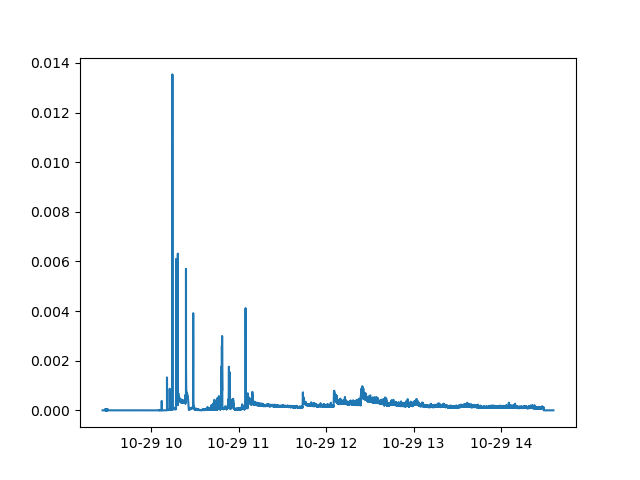

In [8]:
plt.figure()
plt.plot(df_current["datetime"], df_current["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS06"])

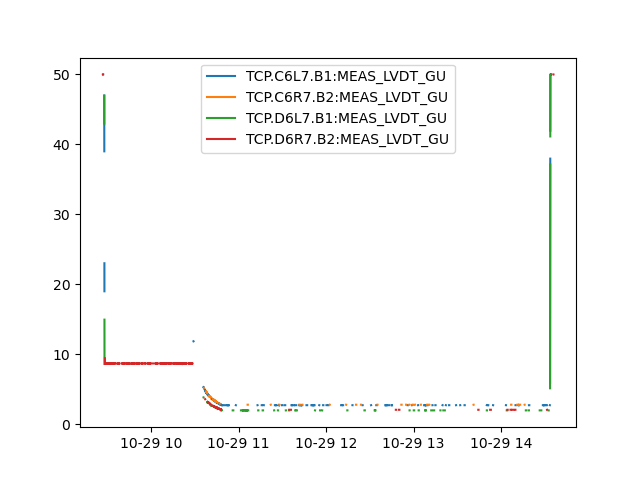

In [9]:
plt.figure()
plt.plot(df_jaw["datetime"], df_jaw["TCP.C6L7.B1:MEAS_LVDT_GU"], label="TCP.C6L7.B1:MEAS_LVDT_GU")
plt.plot(df_jaw["datetime"], df_jaw["TCP.C6R7.B2:MEAS_LVDT_GU"], label="TCP.C6R7.B2:MEAS_LVDT_GU")
plt.plot(df_jaw["datetime"], df_jaw["TCP.D6L7.B1:MEAS_LVDT_GU"], label="TCP.D6L7.B1:MEAS_LVDT_GU")
plt.plot(df_jaw["datetime"], df_jaw["TCP.D6R7.B2:MEAS_LVDT_GU"], label="TCP.D6R7.B2:MEAS_LVDT_GU")

plt.legend()

In [10]:
coll_b1_c = interp.interp1d(df_jaw[df_jaw["TCP.C6L7.B1:MEAS_LVDT_GU"].notna()]["t"], df_jaw["TCP.C6L7.B1:MEAS_LVDT_GU"].dropna(), bounds_error=False)
coll_b1_d = interp.interp1d(df_jaw[df_jaw["TCP.D6L7.B1:MEAS_LVDT_GU"].notna()]["t"], df_jaw["TCP.D6L7.B1:MEAS_LVDT_GU"].dropna(), bounds_error=False)
coll_b2_c = interp.interp1d(df_jaw[df_jaw["TCP.C6R7.B2:MEAS_LVDT_GU"].notna()]["t"], df_jaw["TCP.C6R7.B2:MEAS_LVDT_GU"].dropna(), bounds_error=False)
coll_b2_d = interp.interp1d(df_jaw[df_jaw["TCP.D6R7.B2:MEAS_LVDT_GU"].notna()]["t"], df_jaw["TCP.D6R7.B2:MEAS_LVDT_GU"].dropna(), bounds_error=False)

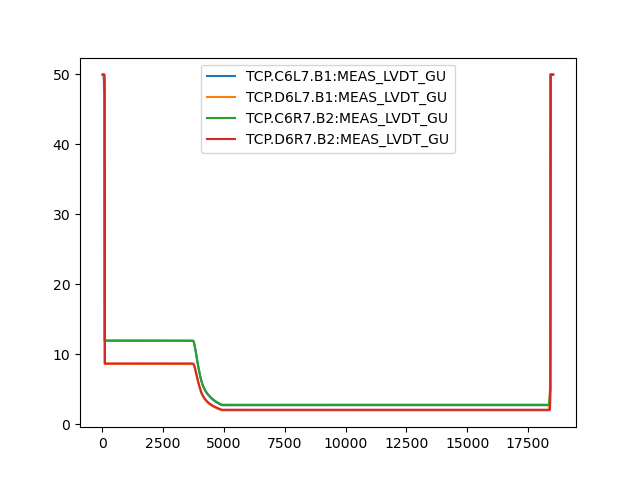

In [11]:
plt.figure()

plt.plot(df_jaw["t"], coll_b1_c(df_jaw["t"]), label="TCP.C6L7.B1:MEAS_LVDT_GU")
plt.plot(df_jaw["t"], coll_b1_d(df_jaw["t"]), label="TCP.D6L7.B1:MEAS_LVDT_GU")
plt.plot(df_jaw["t"], coll_b2_c(df_jaw["t"]), label="TCP.C6R7.B2:MEAS_LVDT_GU")
plt.plot(df_jaw["t"], coll_b2_d(df_jaw["t"]), label="TCP.D6R7.B2:MEAS_LVDT_GU")

plt.legend()

In [12]:
print("TCP.C6L7.B1:MEAS_LVDT_GU", coll_b1_c(6000) / 2, "mm")
print("TCP.D6L7.B1:MEAS_LVDT_GU", coll_b1_d(6000) / 2, "mm")
print("TCP.C6R7.B2:MEAS_LVDT_GU", coll_b2_c(6000) / 2, "mm")
print("TCP.D6R7.B2:MEAS_LVDT_GU", coll_b2_d(6000) / 2, "mm")

val_b1_c = coll_b1_c(6000) / 2
val_b1_d = coll_b1_d(6000) / 2
val_b2_c = coll_b2_c(6000) / 2
val_b2_d = coll_b2_d(6000) / 2

TCP.C6L7.B1:MEAS_LVDT_GU 1.3454924721886588 mm
TCP.D6L7.B1:MEAS_LVDT_GU 0.97498855 mm
TCP.C6R7.B2:MEAS_LVDT_GU 1.3786586664324387 mm
TCP.D6R7.B2:MEAS_LVDT_GU 1.0174029599135046 mm


In [13]:
df_emittance_b1_h = pd.read_csv('timber/EMITTANCE_B1_H.csv', skiprows=3, names=[str(i) for i in range(3565)])
df_emittance_b1_v = pd.read_csv('timber/EMITTANCE_B1_V.csv', skiprows=3, names=[str(i) for i in range(3565)])
df_emittance_b2_h = pd.read_csv('timber/EMITTANCE_B2_H.csv', skiprows=3, names=[str(i) for i in range(3565)])
df_emittance_b2_v = pd.read_csv('timber/EMITTANCE_B2_V.csv', skiprows=3, names=[str(i) for i in range(3565)])

In [14]:
df_emittance_b1_h = utc_time_to_datetime(df_emittance_b1_h, label="0")
df_emittance_b1_v = utc_time_to_datetime(df_emittance_b1_v, label="0")
df_emittance_b2_h = utc_time_to_datetime(df_emittance_b2_h, label="0")
df_emittance_b2_v = utc_time_to_datetime(df_emittance_b2_v, label="0")

In [15]:
print(df_emittance_b1_h["0"].iloc[115])
print(df_emittance_b1_v["0"].iloc[115])
print(df_emittance_b2_h["0"].iloc[75])
print(df_emittance_b2_v["0"].iloc[75])

2018-10-29 11:10:07.553
2018-10-29 11:10:07.553
2018-10-29 11:07:07.962
2018-10-29 11:07:07.962


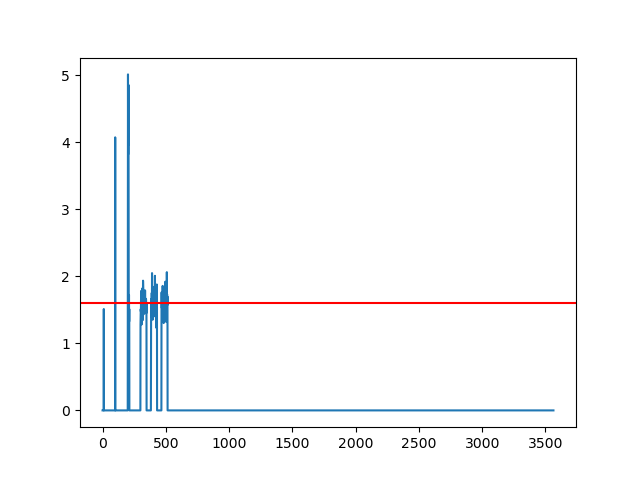

In [16]:
data = df_emittance_b1_h.iloc[115, 1:-1].to_numpy()
data = data[250:750]
average = np.average(data[data > 0.10])
emittance_b1_h = average

plt.figure()
plt.plot(df_emittance_b1_h.iloc[115, 1:-1].to_numpy())
plt.axhline(average, color="red")

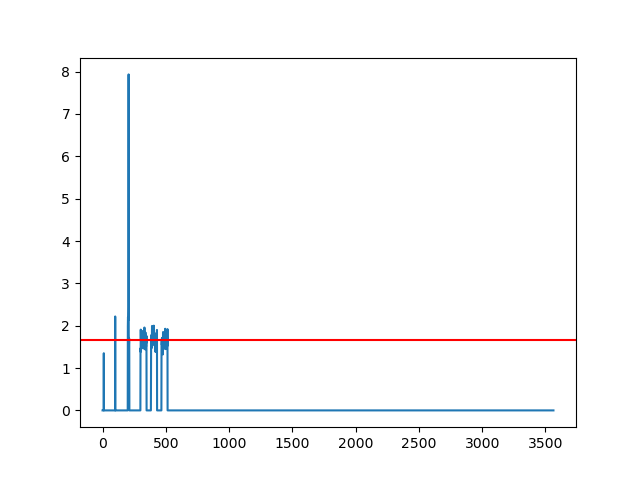

In [17]:
data = df_emittance_b1_v.iloc[115, 1:-1].to_numpy()
data = data[250:750]
average = np.average(data[data > 0.10])
emittance_b1_v = average

plt.figure()
plt.plot(df_emittance_b1_v.iloc[115, 1:-1].to_numpy())
plt.axhline(average, color="red")

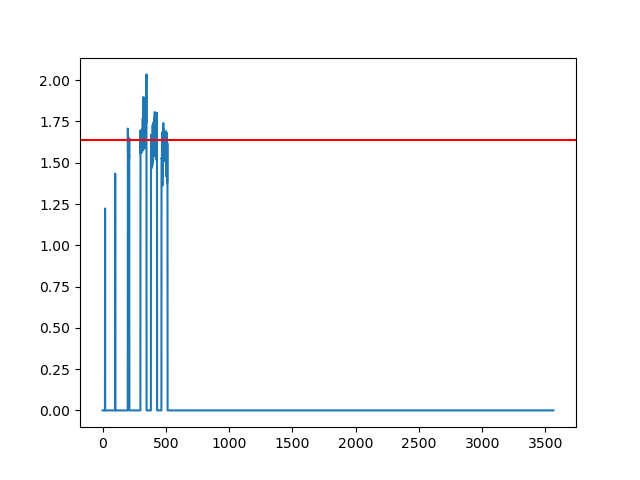

In [18]:
data = df_emittance_b2_h.iloc[115, 1:-1].to_numpy()
data = data[250:750]
average = np.average(data[data > 0.10])
emittance_b2_h = average

plt.figure()
plt.plot(df_emittance_b2_h.iloc[115, 1:-1].to_numpy())
plt.axhline(average, color="red")

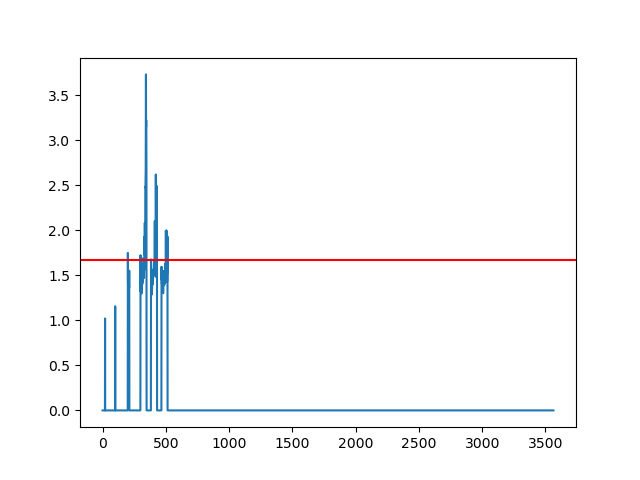

In [19]:
data = df_emittance_b2_v.iloc[115, 1:-1].to_numpy()
data = data[250:750]
average = np.average(data[data > 0.10])
emittance_b2_v = average

plt.figure()
plt.plot(df_emittance_b2_v.iloc[115, 1:-1].to_numpy())
plt.axhline(average, color="red")

In [20]:
print("emittance_b1_h", emittance_b1_h, "um")
print("emittance_b1_v", emittance_b1_v, "um")
print("emittance_b2_h", emittance_b2_h, "um")
print("emittance_b2_v", emittance_b2_v, "um")

emittance_b1_h 1.5985555555555555 um
emittance_b1_v 1.6516805555555554 um
emittance_b2_h 1.6373680555555556 um
emittance_b2_v 1.672833333333334 um


In [21]:
sigma_b1_h = val_b1_c / (0.200 * np.sqrt(emittance_b1_h / 3.5))
sigma_b1_v = val_b1_d / (0.200 * np.sqrt(emittance_b1_v / 3.5))
sigma_b2_h = val_b2_c / (0.200 * np.sqrt(emittance_b2_h / 3.5))
sigma_b2_v = val_b2_d / (0.200 * np.sqrt(emittance_b2_v / 3.5))

print("sigma_b1_h", sigma_b1_h, "$\\sigma$")
print("sigma_b1_v", sigma_b1_v, "$\\sigma$")
print("sigma_b2_h", sigma_b2_h, "$\\sigma$")
print("sigma_b2_v", sigma_b2_v, "$\\sigma$")

sigma_b1_h 9.954545402060425 $\sigma$
sigma_b1_v 7.096439653289289 $\sigma$
sigma_b2_h 10.07830796627749 $\sigma$
sigma_b2_v 7.358184724110533 $\sigma$


In [22]:
orbit_control_df = pd.read_csv('timber/all_data_maybe.csv')
orbit_control_df = utc_time_to_datetime(orbit_control_df)
orbit_control_df = utc_time_to_seconds(orbit_control_df)

In [23]:
cols = list(orbit_control_df.columns)

sel_cols = list(filter(lambda x: "RPMBB" in x, cols))
sel_cols

['RPMBB.UL14.RCBXV1.L1:I_MEAS',
 'RPMBB.UL14.RCBXV2.L1:I_MEAS',
 'RPMBB.UL14.RCBXV3.L1:I_MEAS',
 'RPMBB.UL16.RCBXV1.R1:I_MEAS',
 'RPMBB.UL16.RCBXV2.R1:I_MEAS',
 'RPMBB.UL16.RCBXV3.R1:I_MEAS',
 'RPMBB.UL557.RCBXH1.R5:I_MEAS',
 'RPMBB.UL557.RCBXH2.R5:I_MEAS',
 'RPMBB.UL557.RCBXH3.R5:I_MEAS',
 'RPMBB.USC55.RCBXH1.L5:I_MEAS',
 'RPMBB.USC55.RCBXH2.L5:I_MEAS',
 'RPMBB.USC55.RCBXH3.L5:I_MEAS']

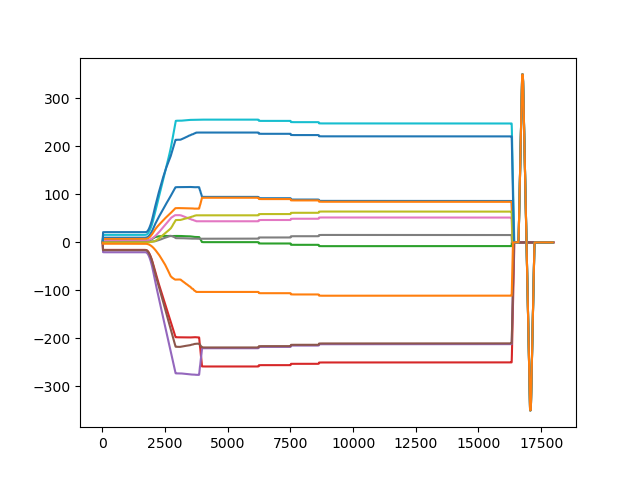

In [24]:
plt.figure()

for l in sel_cols:
    t = orbit_control_df["t"][orbit_control_df[l].notnull()]
    d = orbit_control_df[l][orbit_control_df[l].notnull()]
    plt.plot(t, d)

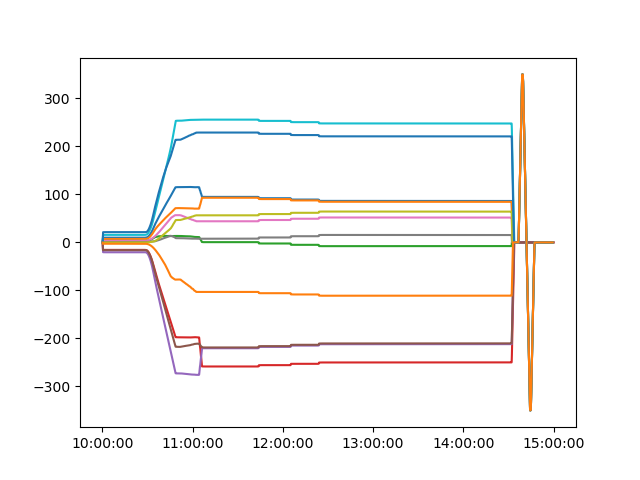

In [26]:
plt.figure()

for l in sel_cols:
    t = orbit_control_df["datetime"][orbit_control_df[l].notnull()]
    d = orbit_control_df[l][orbit_control_df[l].notnull()]
    plt.plot(t, d)


# display timestamps in the plot in hh:mm:ss format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

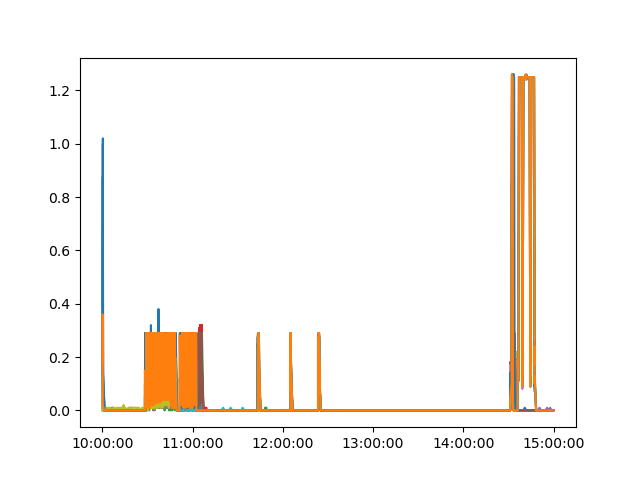

In [29]:
plt.figure()

for l in sel_cols:
    t = orbit_control_df["datetime"][orbit_control_df[l].notnull()].to_numpy()[:-1]
    d = np.abs(np.diff(orbit_control_df[l][orbit_control_df[l].notnull()].to_numpy()))
    plt.plot(t, d)


# display timestamps in the plot in hh:mm:ss format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

In [33]:
orbit_control_df["datetime"][orbit_control_df[l].notnull()][19]

Timestamp('2018-10-29 10:00:08.020000')

In [37]:
# make datetime from string '2018-10-29 10:00:08.020000'
from_t = datetime.datetime.strptime('2018-10-29 11:40:00.000000', '%Y-%m-%d %H:%M:%S.%f')
to_t = datetime.datetime.strptime('2018-10-29 12:30:00.000000', '%Y-%m-%d %H:%M:%S.%f')

In [39]:
# make linspace of datetimes
t_linspace = pd.date_range(from_t, to_t, freq='1s')

In [40]:
t_linspace

DatetimeIndex(['2018-10-29 11:40:00', '2018-10-29 11:40:01',
               '2018-10-29 11:40:02', '2018-10-29 11:40:03',
               '2018-10-29 11:40:04', '2018-10-29 11:40:05',
               '2018-10-29 11:40:06', '2018-10-29 11:40:07',
               '2018-10-29 11:40:08', '2018-10-29 11:40:09',
               ...
               '2018-10-29 12:29:51', '2018-10-29 12:29:52',
               '2018-10-29 12:29:53', '2018-10-29 12:29:54',
               '2018-10-29 12:29:55', '2018-10-29 12:29:56',
               '2018-10-29 12:29:57', '2018-10-29 12:29:58',
               '2018-10-29 12:29:59', '2018-10-29 12:30:00'],
              dtype='datetime64[ns]', length=3001, freq='S')

In [ ]:
"11:42:49"
"11:45:04"

"12:05:01"
"12:06:21"

"12:23:20"
"12:25:02"